In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

In [2]:
!pip install seaborn

In [3]:
df = pd.read_csv('traffic volume - traffic volume.csv')


In [4]:
df.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,9:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [5]:
df.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [7]:
df.isnull().sum()

holiday           48143
temp                 53
rain                  2
snow                 12
weather              49
date                  0
Time                  0
traffic_volume        0
dtype: int64

In [8]:
df['temp'].fillna(df['temp'].mean(),inplace=True) 
df['rain'].fillna(df['rain'].mean(),inplace=True)
df['snow'].fillna(df['snow'].mean(),inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_1336\4158193514.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['temp'].fillna(df['temp'].mean(),inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_1336\4158193514.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [9]:
df['weather'].fillna(df['weather'].mode()[0],inplace=True)
df['holiday'].fillna(df['holiday'].mode()[0],inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_1336\1181986075.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['weather'].fillna(df['weather'].mode()[0],inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_1336\1181986075.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [10]:
df

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,Labor Day,288.28,0.0,0.0,Clouds,02-10-2012,9:00:00,5545
1,Labor Day,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,Labor Day,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,Labor Day,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,Labor Day,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918
...,...,...,...,...,...,...,...,...
48199,Labor Day,283.45,0.0,0.0,Clouds,30-09-2018,19:00:00,3543
48200,Labor Day,282.76,0.0,0.0,Clouds,30-09-2018,20:00:00,2781
48201,Labor Day,282.73,0.0,0.0,Thunderstorm,30-09-2018,21:00:00,2159
48202,Labor Day,282.09,0.0,0.0,Clouds,30-09-2018,22:00:00,1450


In [11]:
df['holiday'] = 1
df['holiday'] = df['holiday'].map({'Labor Day': 1})

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['holiday'] = le.fit_transform(df['holiday'])
df['weather']=le.fit_transform(df['weather'])

In [13]:
df

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,0,288.28,0.0,0.0,1,02-10-2012,9:00:00,5545
1,0,289.36,0.0,0.0,1,02-10-2012,10:00:00,4516
2,0,289.58,0.0,0.0,1,02-10-2012,11:00:00,4767
3,0,290.13,0.0,0.0,1,02-10-2012,12:00:00,5026
4,0,291.14,0.0,0.0,1,02-10-2012,13:00:00,4918
...,...,...,...,...,...,...,...,...
48199,0,283.45,0.0,0.0,1,30-09-2018,19:00:00,3543
48200,0,282.76,0.0,0.0,1,30-09-2018,20:00:00,2781
48201,0,282.73,0.0,0.0,10,30-09-2018,21:00:00,2159
48202,0,282.09,0.0,0.0,1,30-09-2018,22:00:00,1450


In [14]:
# df.corr()

In [15]:
import seaborn as sns

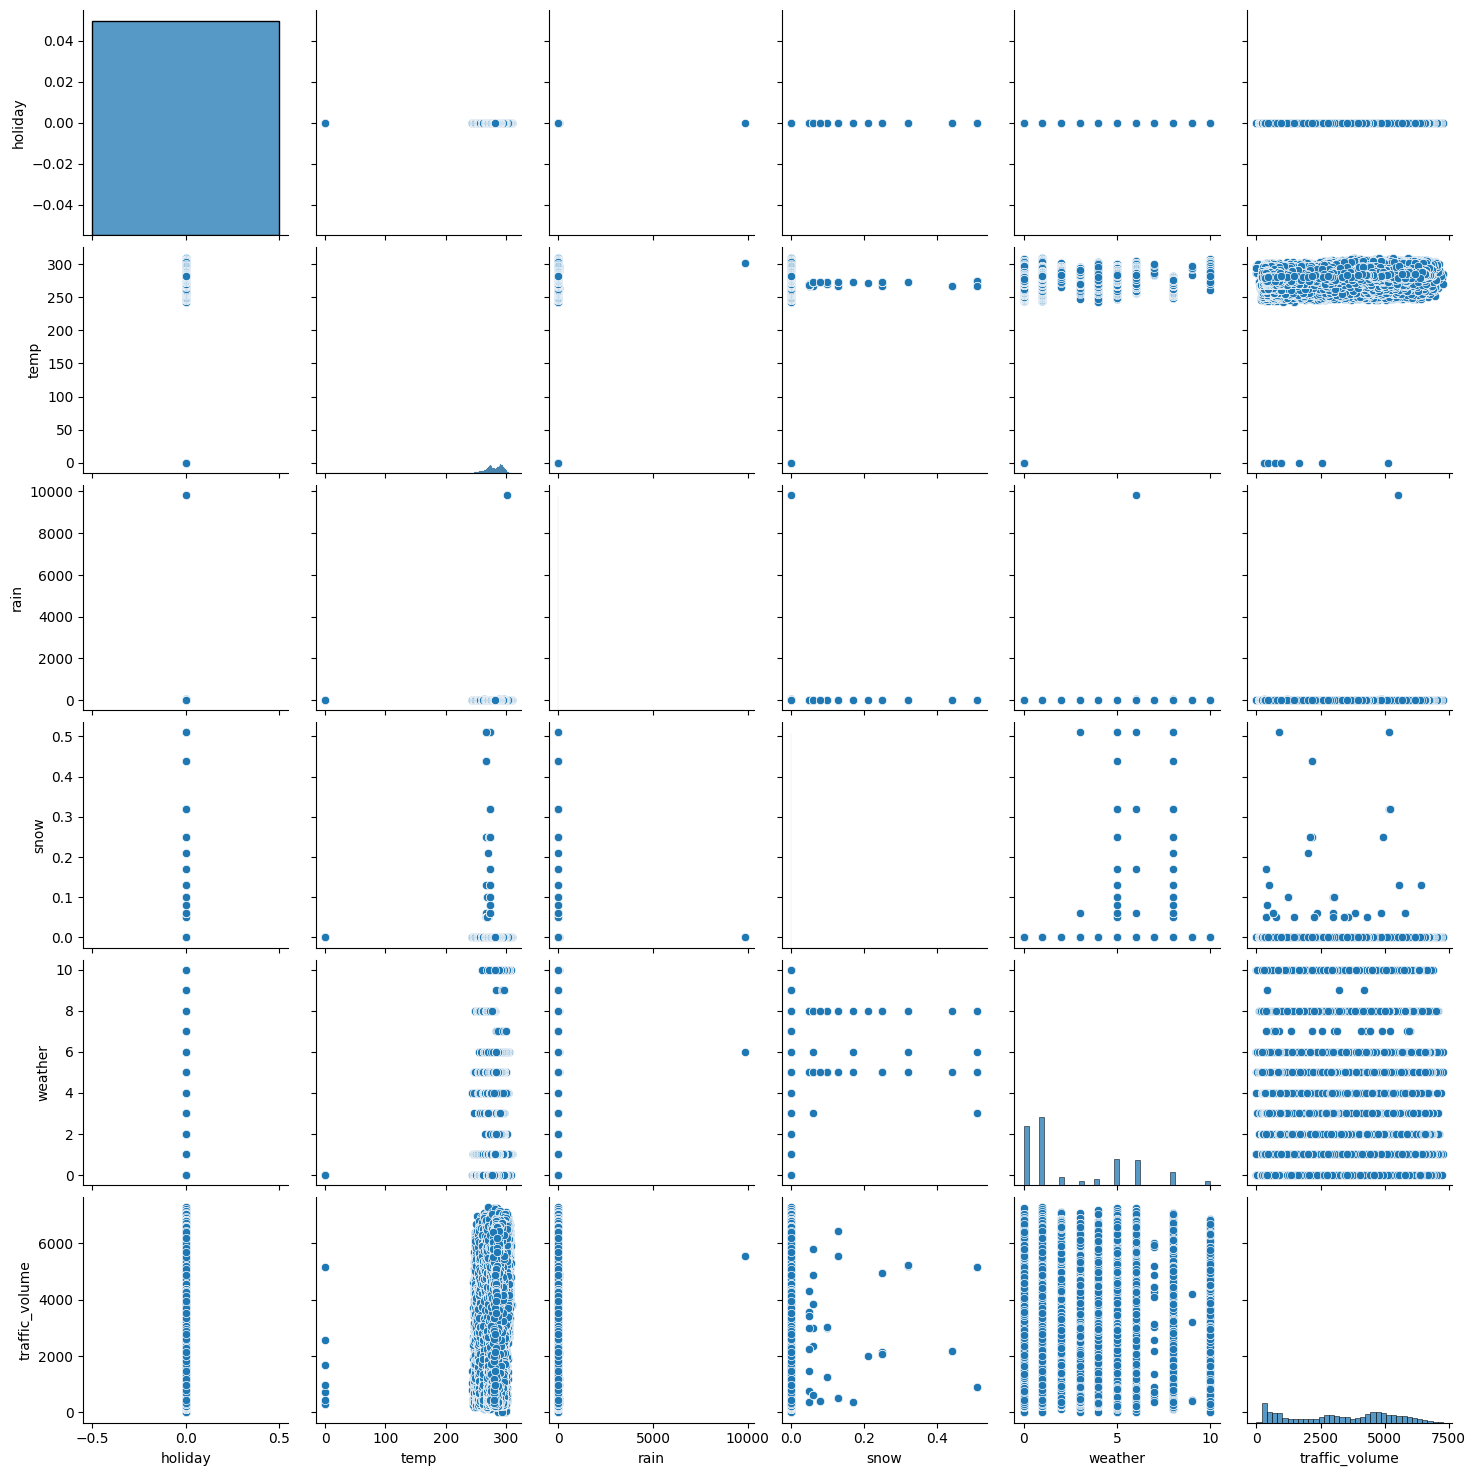

In [16]:
sns.pairplot(df)

<Axes: >

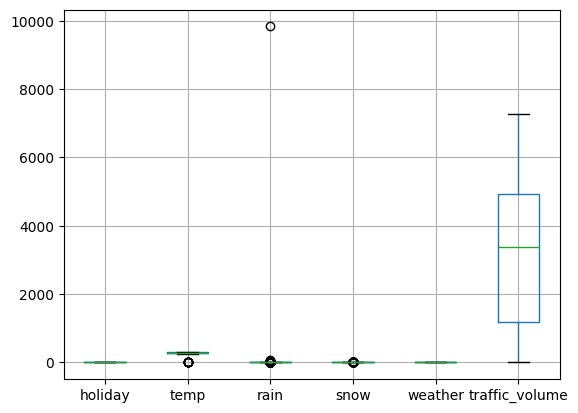

In [17]:
df.boxplot()

In [18]:
df.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,0,288.28,0.0,0.0,1,02-10-2012,9:00:00,5545
1,0,289.36,0.0,0.0,1,02-10-2012,10:00:00,4516
2,0,289.58,0.0,0.0,1,02-10-2012,11:00:00,4767
3,0,290.13,0.0,0.0,1,02-10-2012,12:00:00,5026
4,0,291.14,0.0,0.0,1,02-10-2012,13:00:00,4918


In [19]:
# df.drop(columns=['date'],inplace=True)
import pandas as pd

# Combine 'date' and 'Time' columns into a single datetime column
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['Time'], format='%d-%m-%Y %H:%M:%S')

# Extract date and time components
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hours'] = df['datetime'].dt.hour
df['minutes'] = df['datetime'].dt.minute
df['seconds'] = df['datetime'].dt.second

# Drop original 'date' and 'Time' columns
df.drop(columns=['date', 'Time'], inplace=True)

# Optional: Drop 'datetime' column if you don't need it
# df.drop(columns=['datetime'], inplace=True)

# Show first 5 rows
df.head()


,holiday,temp,rain,snow,weather,traffic_volume,datetime,year,month,day,hours,minutes,seconds
0,0,288.28,0.0,0.0,1,5545,2012-10-02 09:00:00,2012,10,2,9,0,0
1,0,289.36,0.0,0.0,1,4516,2012-10-02 10:00:00,2012,10,2,10,0,0
2,0,289.58,0.0,0.0,1,4767,2012-10-02 11:00:00,2012,10,2,11,0,0
3,0,290.13,0.0,0.0,1,5026,2012-10-02 12:00:00,2012,10,2,12,0,0
4,0,291.14,0.0,0.0,1,4918,2012-10-02 13:00:00,2012,10,2,13,0,0


In [20]:
df.drop(columns=['datetime'],inplace=True)
df.head()



,holiday,temp,rain,snow,weather,traffic_volume,year,month,day,hours,minutes,seconds
0,0,288.28,0.0,0.0,1,5545,2012,10,2,9,0,0
1,0,289.36,0.0,0.0,1,4516,2012,10,2,10,0,0
2,0,289.58,0.0,0.0,1,4767,2012,10,2,11,0,0
3,0,290.13,0.0,0.0,1,5026,2012,10,2,12,0,0
4,0,291.14,0.0,0.0,1,4918,2012,10,2,13,0,0


In [21]:
# df.drop(columns=['Time'],inplace=True)


In [22]:
df.head()

,holiday,temp,rain,snow,weather,traffic_volume,year,month,day,hours,minutes,seconds
0,0,288.28,0.0,0.0,1,5545,2012,10,2,9,0,0
1,0,289.36,0.0,0.0,1,4516,2012,10,2,10,0,0
2,0,289.58,0.0,0.0,1,4767,2012,10,2,11,0,0
3,0,290.13,0.0,0.0,1,5026,2012,10,2,12,0,0
4,0,291.14,0.0,0.0,1,4918,2012,10,2,13,0,0


In [23]:
df.head()

,holiday,temp,rain,snow,weather,traffic_volume,year,month,day,hours,minutes,seconds
0,0,288.28,0.0,0.0,1,5545,2012,10,2,9,0,0
1,0,289.36,0.0,0.0,1,4516,2012,10,2,10,0,0
2,0,289.58,0.0,0.0,1,4767,2012,10,2,11,0,0
3,0,290.13,0.0,0.0,1,5026,2012,10,2,12,0,0
4,0,291.14,0.0,0.0,1,4918,2012,10,2,13,0,0


In [24]:
# Target variable
y = df['traffic_volume']

# Feature set (drop traffic_volume)
x = df.drop(columns=['traffic_volume'], axis=1)


In [25]:
import pandas as pd
from sklearn.preprocessing import scale

# Step 1: Separate target variable
y = df['traffic_volume']

# Step 2: Drop target from features
x = df.drop(columns=['traffic_volume'], axis=1)

# Step 3: Save column names before scaling
names = x.columns

# Step 4: Apply scaling (Z-score normalization)
x = scale(x)  # This returns a NumPy array

# Step 5: Convert scaled data back to DataFrame with original column names
x = pd.DataFrame(x, columns=names)

# Step 6: Preview the result
x.head()


,holiday,temp,rain,snow,weather,year,month,day,hours,minutes,seconds
0,0.0,0.530485,-0.007463,-0.027235,-0.566452,-1.855294,1.02758,-1.574903,-0.345548,0.0,0.0
1,0.0,0.611467,-0.007463,-0.027235,-0.566452,-1.855294,1.02758,-1.574903,-0.201459,0.0,0.0
2,0.0,0.627964,-0.007463,-0.027235,-0.566452,-1.855294,1.02758,-1.574903,-0.057371,0.0,0.0
3,0.0,0.669205,-0.007463,-0.027235,-0.566452,-1.855294,1.02758,-1.574903,0.086718,0.0,0.0
4,0.0,0.744939,-0.007463,-0.027235,-0.566452,-1.855294,1.02758,-1.574903,0.230807,0.0,0.0


In [26]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0
)


In [27]:
from sklearn import linear_model, tree, ensemble, svm
import xgboost
from sklearn.metrics import r2_score, mean_squared_error

# Initialize models
lin_reg = linear_model.LinearRegression()
Dtree = tree.DecisionTreeRegressor()
Rand = ensemble.RandomForestRegressor()
svr = svm.SVR()
XGB = xgboost.XGBRegressor()


# Train all models
lin_reg.fit(x_train, y_train)
Dtree.fit(x_train, y_train)
Rand.fit(x_train, y_train)
svr.fit(x_train, y_train)
XGB.fit(x_train, y_train)


# Predict on training set
p1 = lin_reg.predict(x_train)
p2 = Dtree.predict(x_train)
p3 = Rand.predict(x_train)
p4 = svr.predict(x_train)
p5 = XGB.predict(x_train)


In [28]:
from sklearn import metrics

# R² Score on training predictions
print("Linear Regression R² on training set:", metrics.r2_score(y_train, p1))
print("Decision Tree R² on training set:", metrics.r2_score(y_train, p2))
print("Random Forest R² on training set:", metrics.r2_score(y_train, p3))
print("SVR R² on training set:", metrics.r2_score(y_train, p4))
print("XGBoost R² on training set:", metrics.r2_score(y_train, p5))


Linear Regression R² on training set: 0.13296715651758817
Decision Tree R² on training set: 1.0
Random Forest R² on training set: 0.9774641542381987
SVR R² on training set: 0.25417555904090483
XGBoost R² on training set: 0.8734947443008423


In [29]:
p1=lin_reg.predict(x_test)
p2=Dtree.predict(x_test)
p3=Rand.predict(x_test)
p4=svr.predict(x_test)
p5=XGB.predict(x_test)

print(metrics.r2_score(y_test, p1))
print(metrics.r2_score(y_test, p2))
print(metrics.r2_score(y_test, p3))
print(metrics.r2_score(y_test, p4))
print(metrics.r2_score(y_test, p5))



0.13558012821266197
0.6881461887460081
0.8391783560539203
0.25808608029636915
0.8377184271812439


In [30]:
MSE=metrics.mean_squared_error(p3,y_test)
np.sqrt(MSE)

np.float64(793.0544564468826)

In [31]:
import pickle

pickle.dump(Rand,open("model.pkl",'wb'))
pickle.dump(le,open("encoder.pkl",'wb'))